In [1]:
import numpy as np
import scipy as sp
import scipy.signal as sps
import matplotlib.pyplot as plt

In [2]:
def KonstruirajGausssian(space, mu, s):
    return 1/(s*np.sqrt(2*np.pi)) * np.exp(-0.5 * (space - mu)**2/(s)**2) 

def NajmanjiKvadrati(x):
    pok = sps.convolve(x,kernel)
    return np.mean(np.square(x - konv))

def Tikhonov (x):
    l = 10**-1
    return NajmanjiKvadrati(x) + l*np.mean(np.square(x))

In [3]:
n = 50
space = np.linspace(0,1,n+1)
kernel_space = np.linspace(0,1,n)


In [5]:
dioKernela =np.array([1/2,1/3,1/6]) #KonstruirajGausssian(kernel_space,0,0.1)#
kernel = np.zeros(n+1)
kernel[0:len(dioKernela)] = dioKernela
#kernel = kernel/np.sum(kernel)
#kernel = np.loadtxt('Primjeri/Kernel2.txt')
KonvMatrica = sp.linalg.toeplitz(kernel)
u,s,v = np.linalg.svd(KonvMatrica)
plt.plot(s)
plt.show()
print(s)

[1.49641187 1.48568647 1.46794024 1.44336551 1.41222799 1.37486317
 1.33167191 1.28311514 1.22970774 1.17201177 1.11062908 1.04619345
 0.97936233 0.91080836 0.84121069 0.77124642 0.70158206 0.63286538
 0.56571764 0.5007266  0.43844043 0.37936338 0.32395439 0.27263349
 0.22581456 0.18411564 0.16554464 0.16189944 0.15716756 0.14850787
 0.14785637 0.13672566 0.12902509 0.11471111 0.11351817 0.09844483
 0.0916062  0.07836887 0.07414597 0.05789221 0.05776375 0.04236929
 0.04020888 0.02813528 0.02599473 0.01616326 0.0148338  0.00725847
 0.00668339 0.00182276 0.00168668]


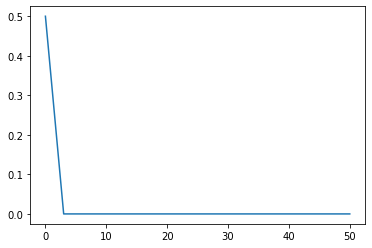

51


In [6]:
plt.plot(kernel)
plt.show()
print(len(kernel))

In [7]:
#np.savetxt('Primjeri/Kernel3.txt', kernel)

In [8]:
signal = 2* KonstruirajGausssian(space, 0.2, 0.2) + KonstruirajGausssian(space, 0.7, 0.1)
#signal[24] = signal[24] + 2
#signal = np.ones(n+1)

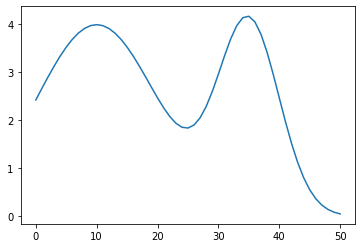

In [9]:
plt.plot(signal)
plt.show()

In [10]:
#np.savetxt('Primjeri/signal2',signal)

In [11]:
noise = np.random.randn(n+1)*0.05
KonvMatrica = sp.linalg.toeplitz(kernel)

konv = np.dot(KonvMatrica,signal) + noise

In [12]:
plt.plot(konv)
plt.show()

In [13]:
np.savetxt('Primjeri/Konv0', konv)

In [14]:
rje = np.dot(np.linalg.inv(KonvMatrica),konv)

In [15]:
plt.plot(rje)
plt.plot(signal)
plt.show()

plt.plot(rje - signal)
plt.show()

In [16]:
tmpTikh = np.zeros([2*n+2,n+1])
tmpTikh[0:n+1,:] = KonvMatrica
l = 10**-1
tmpTikh[n+1:,:] = l * np.eye(n+1)

konvTikh = np.zeros(2*n+2)
konvTikh[0:n+1] = konv
konvTikh[n+1:] = 0

plt.imshow(tmpTikh)
plt.show()
rjeTikh = np.dot(np.linalg.pinv(tmpTikh),konvTikh)

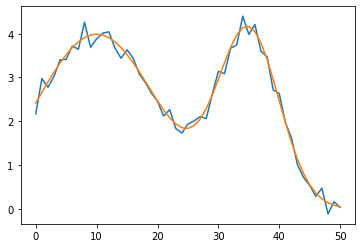

In [17]:
plt.plot(rjeTikh)
plt.plot(signal)
plt.show()

plt.plot(rjeTikh - signal)
plt.show()

In [ ]:
tmpTikh = np.zeros([2*n+2,n+1])
tmpTikh[0:n+1,:] = KonvMatrica
l = 10**0
tmp = np.zeros(n+1)
tmp[0:2] = [1,-1]
tmp2 = np.zeros(n+1)
tmp2[0] = 1
tmpTikh[n+1:,:] = l * sp.linalg.toeplitz(c = tmp, r = tmp2)

konvTikh = np.zeros(2*n+2)
konvTikh[0:n+1] = konv
konvTikh[n+1:] = 0
print(sp.linalg.toeplitz(c = tmp, r = tmp2).shape)

plt.imshow(tmpTikh)
plt.show()
rjeTikh = np.dot(np.linalg.pinv(tmpTikh),konvTikh)

In [ ]:
plt.plot(rjeTikh)
plt.plot(signal)
plt.show()

plt.plot(rjeTikh - signal)
plt.show()